In [2]:
# Project#1 21 Projects in 21 Days Batch 4:L1:Data Storytelling: Analysing Survival on the Titanic

#Project Objective: To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival
#on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and visualization,
#with theoretical explanations at each stage.
#
# Name : Rajesh Manicavasagam
# Date : 12/17/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("First Project - EDA on  Titanic Dataset\n")
# Set plot style for better aesthetics
sns.set(style='darkgrid')

!git clone https://github.com/HarshvardhanSingh-13/Datasets

# Load the dataset from the original URL
print("Load the original Titanic Dataset...")
titanic_df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
titanic_df.head()

# Display the last 5 rows
print("Last 5 rows of titanic_df:")
display(titanic_df.tail())

First Project - EDA on  Titanic Dataset

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 31.59 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.
Load the original Titanic Dataset...
First 5 rows of the dataset:
Last 5 rows of titanic_df:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
# Display the first 5 rows
print("Last 5 rows of titanic_df:")
display(titanic_df.tail())


Last 5 rows of titanic_df:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#describe the dataset
print("Descriptive statistics of titanic_df:")
display(titanic_df.describe())

Descriptive statistics of titanic_df:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#get info on the dataset
print("Descriptive info of titanic_df:")
display(titanic_df.info())

Descriptive info of titanic_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [6]:
#identify missing values and percentage of missing
print("Missing values in each column:")
missing_values = titanic_df.isnull().sum()
missing_percentage = (titanic_df.isnull().sum() / len(titanic_df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_info)

Missing values in each column:
             Missing Count  Missing Percentage
PassengerId              0            0.000000
Survived                 0            0.000000
Pclass                   0            0.000000
Name                     0            0.000000
Sex                      0            0.000000
Age                    177           19.865320
SibSp                    0            0.000000
Parch                    0            0.000000
Ticket                   0            0.000000
Fare                     0            0.000000
Cabin                  687           77.104377
Embarked                 2            0.224467


In [7]:
# Filter to show only columns (not zero) with missing values and sort
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

display(missing_info)

,Missing Count,Missing Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [10]:
# data cleaning process

# Drop the 'Cabin' column due to a large number of missing values
print("Dropping 'Cabin' column...")
if 'Cabin' in titanic_df.columns:
    titanic_df.drop('Cabin', axis=1, inplace=True)
else:
    print("'Cabin' column already dropped or not found.")


# Impute missing 'Age' values with the mean
print("Imputing missing 'Age' values with the mean...")
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# Impute missing 'Embarked' values with the mode (most frequent value)
print("Imputing missing 'Embarked' values with the mode...")
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

print("Data cleaning complete. Checking for remaining missing values...")
# Verify that missing values have been handled
missing_values_after_cleaning = titanic_df.isnull().sum()
missing_percentage_after_cleaning = (titanic_df.isnull().sum() / len(titanic_df)) * 100

cleaned_missing_info = pd.DataFrame({
    'Missing Count': missing_values_after_cleaning,
    'Missing Percentage': missing_percentage_after_cleaning
})

# Filter to show only columns with missing values (should be none)
cleaned_missing_info = cleaned_missing_info[cleaned_missing_info['Missing Count'] > 0]

display(cleaned_missing_info)

if cleaned_missing_info.empty:
    print("No missing values remaining in the dataset.")
else:
    print("Some missing values still exist. Please review the output above.")

# Verify that there are no more missing values in the columns we handled
print("Missing values after cleaning:")
titanic_df.isna().sum()

Dropping 'Cabin' column...
'Cabin' column already dropped or not found.
Imputing missing 'Age' values with the mean...
Imputing missing 'Embarked' values with the mode...
Data cleaning complete. Checking for remaining missing values...


,Missing Count,Missing Percentage


No missing values remaining in the dataset.
Missing values after cleaning:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Analyzing categorical features:


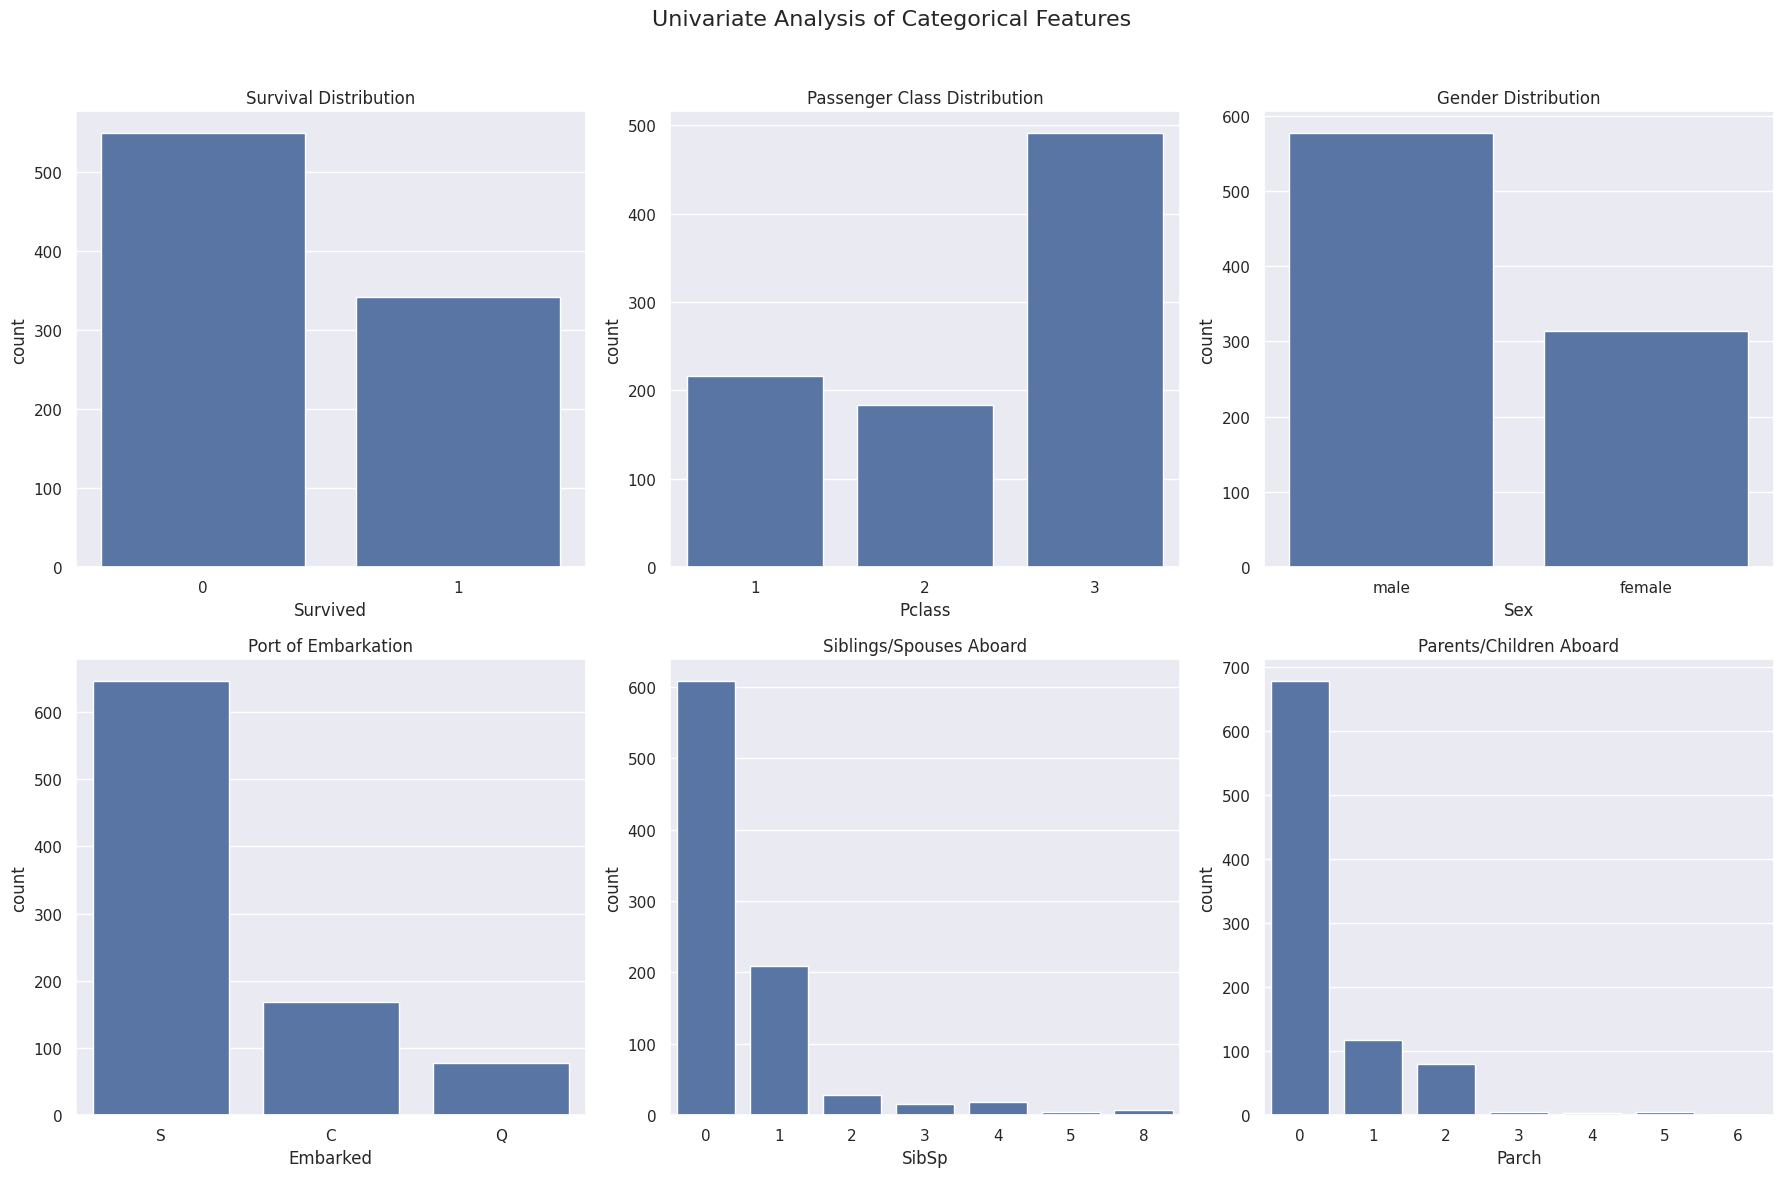

In [11]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Analyzing numerical features:


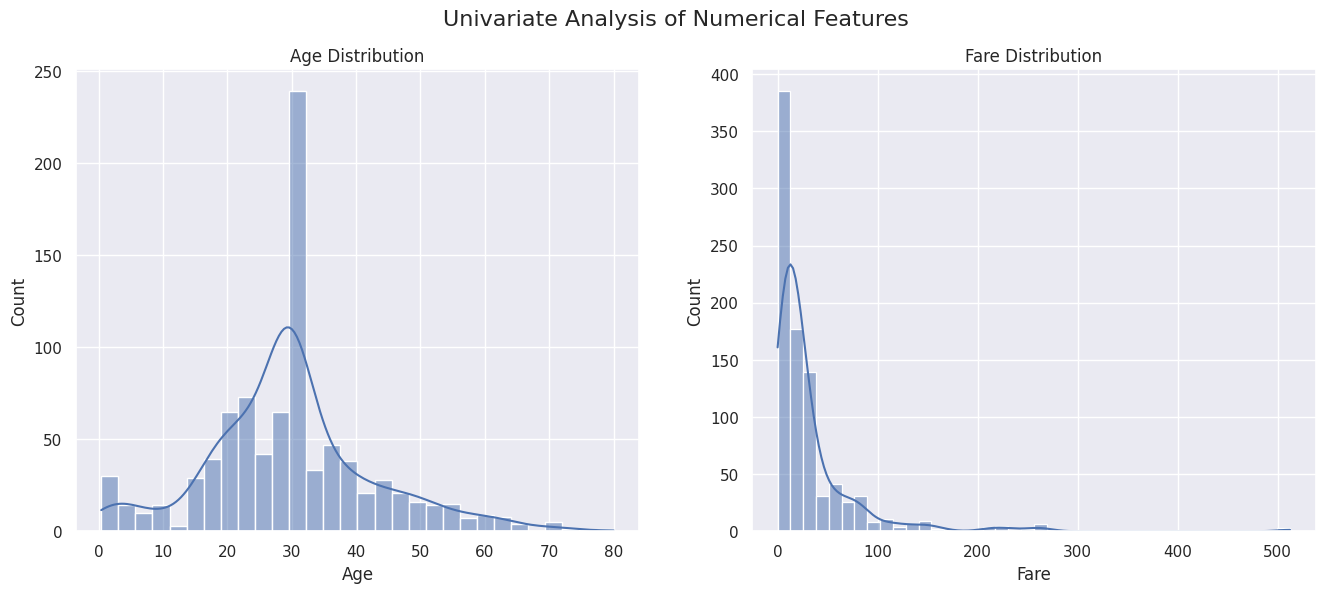

In [12]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=titanic_df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=titanic_df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

Bivariate Analysis: Feature vs. Survival


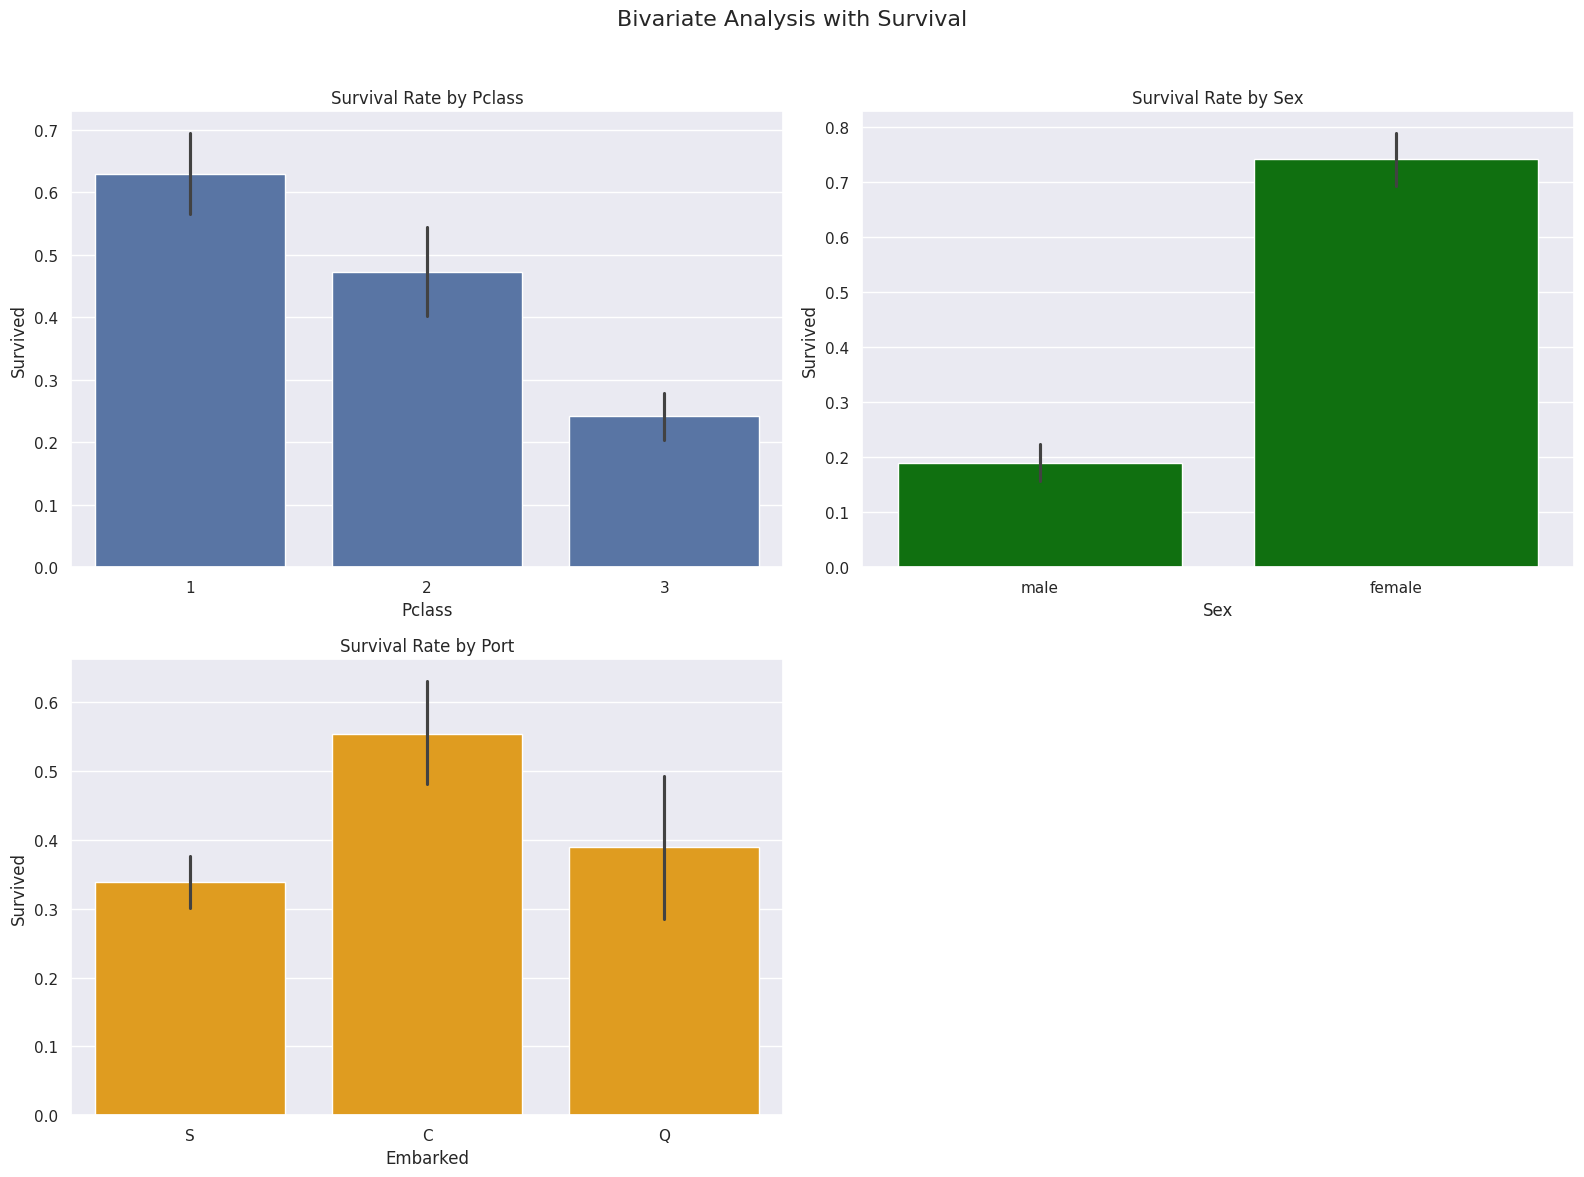

In [13]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_df, color="green").set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_df, color="orange").set_title('Survival Rate by Port')

# Has_Cabin vs. Survived - column cabin has been removed
#sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=titanic_df).set_title('Survival Rate by Cabin Availability')
axes[1,1].set_visible(False) # Corrected line to hide the subplot

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

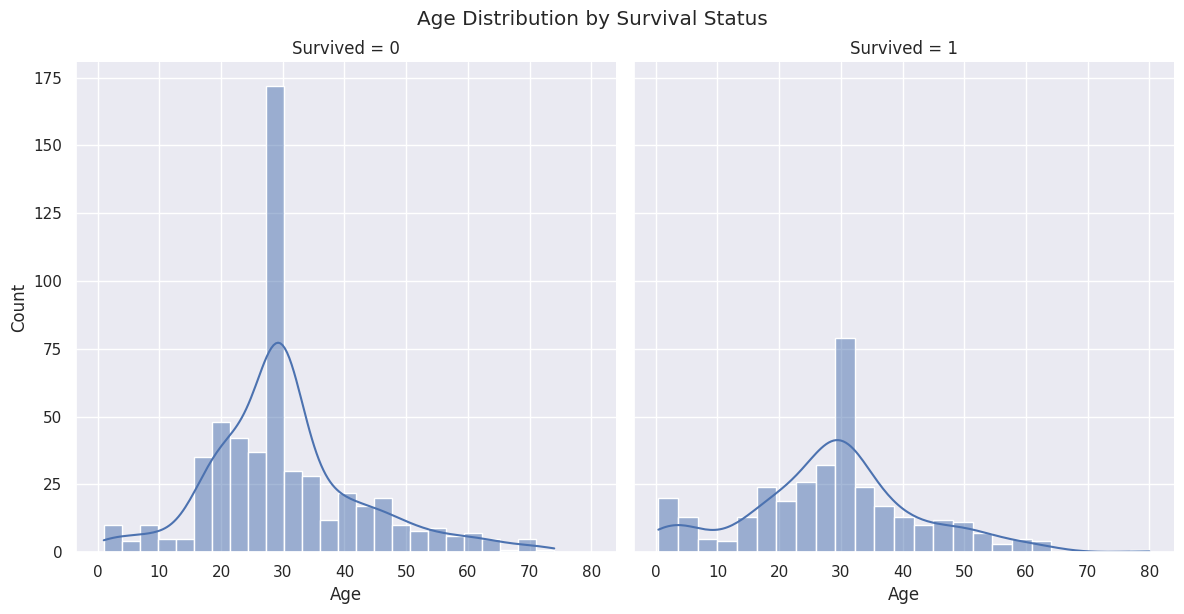

In [14]:
# Age vs. Survival
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

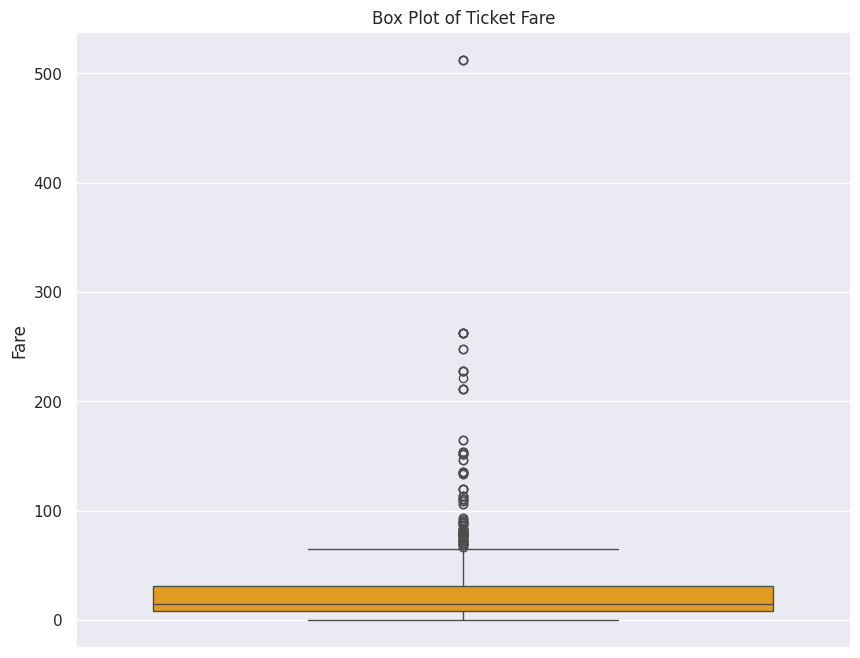

In [15]:
# use box plot
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_df, color="orange")
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

In [16]:
#Feature Engineering
# 1. Create a 'FamilySize' feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


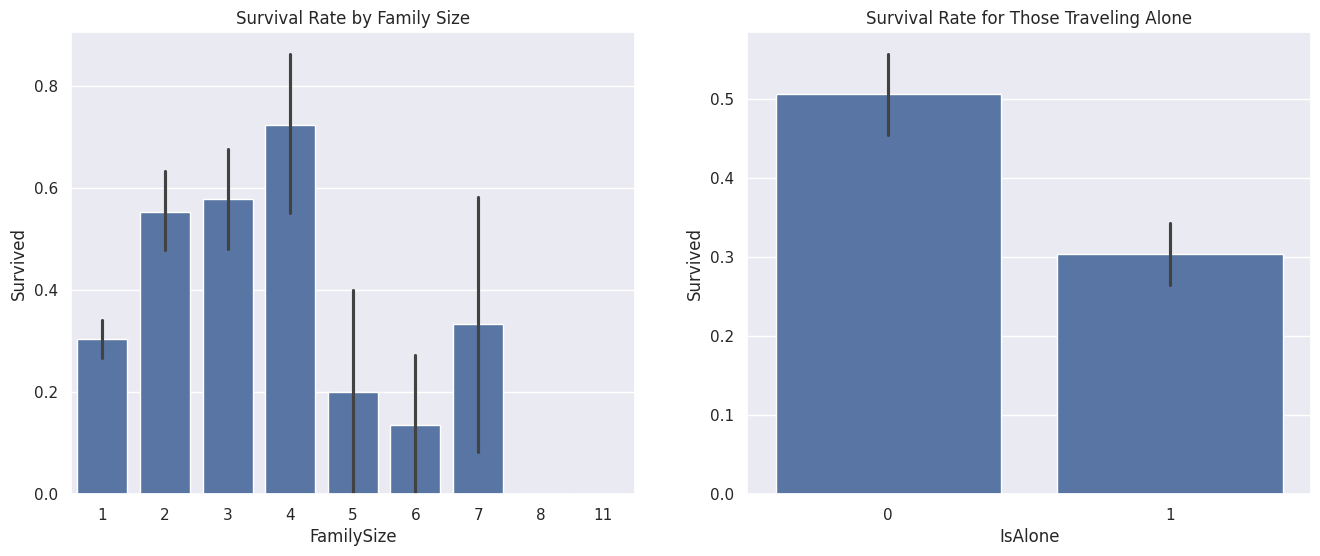

In [17]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

In [18]:
# 3. Extract 'Title' from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
titanic_df['Title'].value_counts()


Extracted Titles:


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


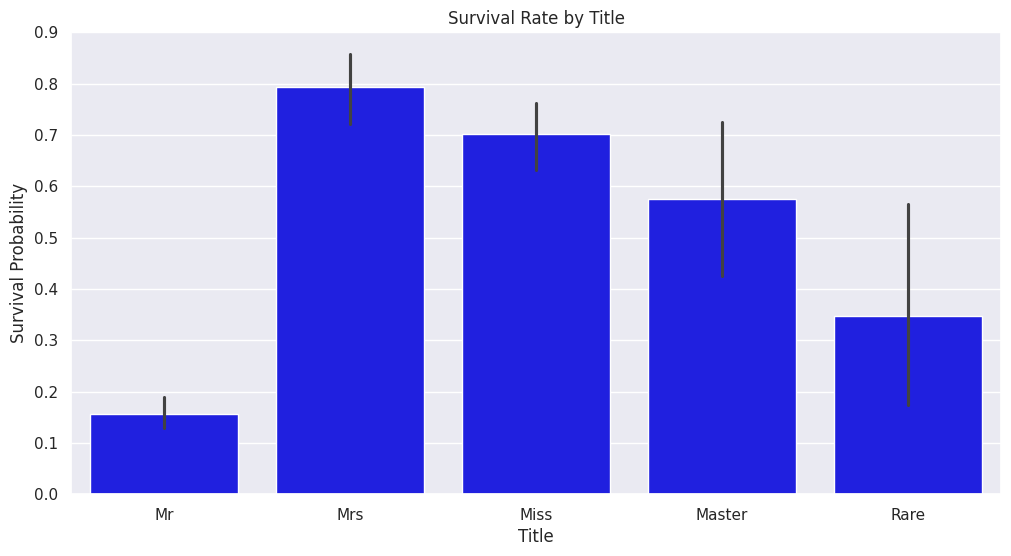

In [19]:
# Simplify the titles by grouping rare ones into a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df,color="blue")
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

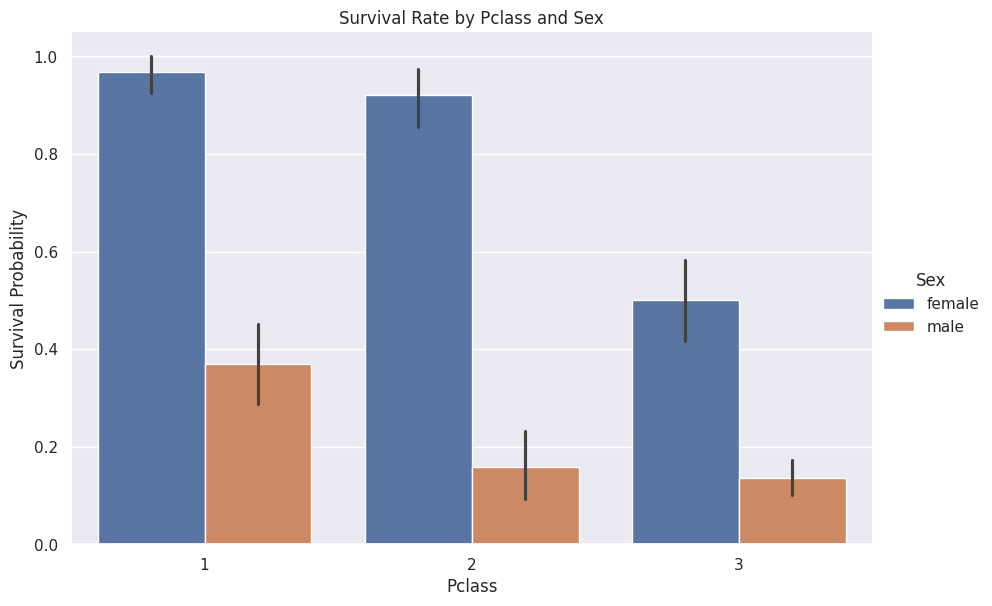

In [20]:
#Multivariate Analysis
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

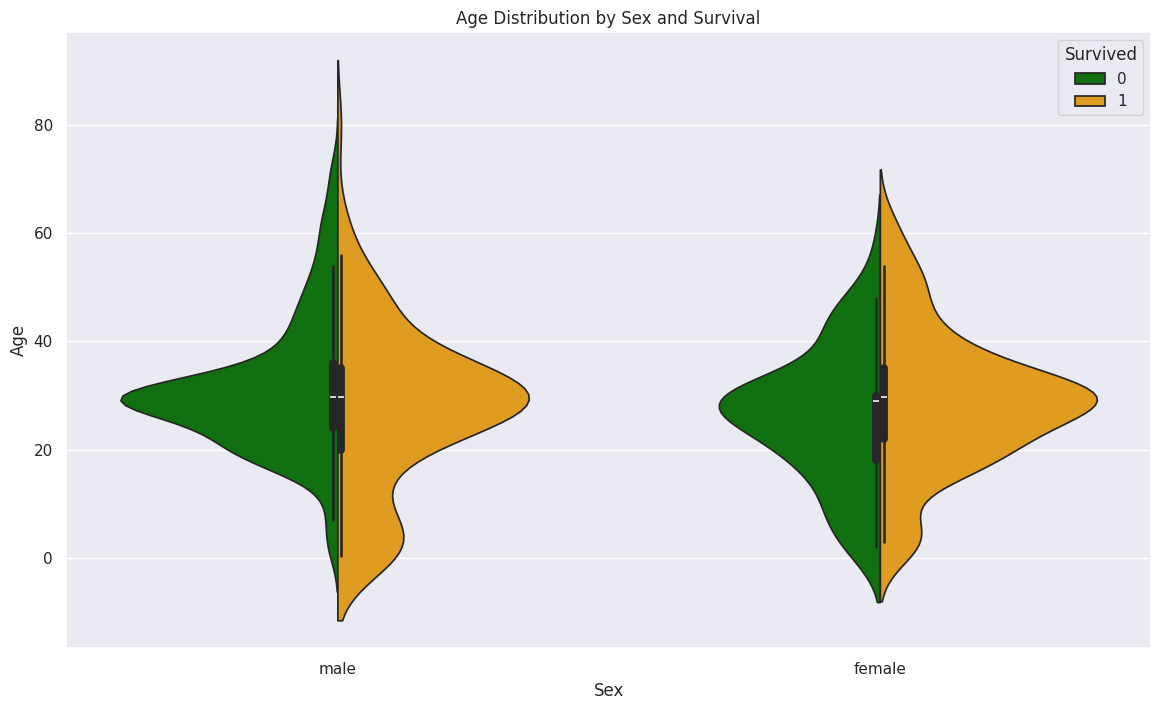

In [21]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'green', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

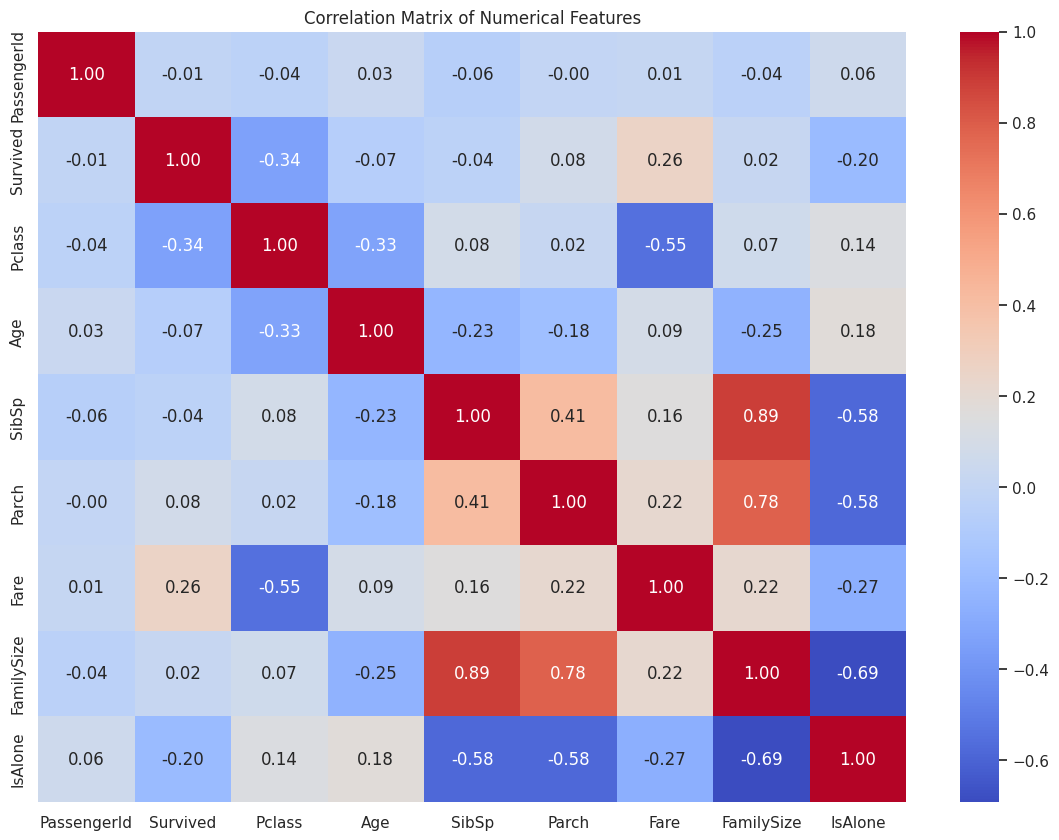

In [22]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [23]:
# Install ydata-profiling
!pip install ydata-profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00


In [24]:
print(f"Titanic dataset has {titanic_df.shape[0]} rows and {titanic_df.shape[1]} columns.")

Titanic dataset has 891 rows and 14 columns.


In [25]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(titanic_df, title="Titanic Dataset Profiling Report ")

# Display the report in the notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
# Save the report to an HTML file
profile.to_file("eda_titanic_ds.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]